# Statistical Classification of accoustic indices

## Importing the libraries

In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
!git clone https://github.com/amarmeddahi/sounds-of-nature.git
path = "./sounds-of-nature/data/latent_space_mel128_512.csv"

fatal: destination path 'sounds-of-nature' already exists and is not an empty directory.


In [9]:
df = pd.read_csv(path)

## Cleaning the dataset

In [12]:
# Drop duplicate rows
df = df.drop_duplicates()

In [13]:
# Drop columns with high percentage of missing values
missing_threshold = 0.8
df = df.dropna(thresh=int(missing_threshold * len(df)), axis=1)

In [14]:
# Drop rows with missing values
df = df.dropna()

## Selecting the labels

In [15]:
X = df.iloc[:, 3:-1].values.astype(float)

In [16]:
labels = ["BE-BL-RE-RL", "R-B", "L-E"]
l = labels[0]
if l == "R-B":
  y = np.array([s[0] for s in df.iloc[:, -1].values])
elif l == "L-E":
  y = np.array([s[1] for s in df.iloc[:, -1].values])
else:
  y = df.iloc[:, -1].values

## Encoding the labels

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [18]:
# Splitting randomy the dataset into the Training set and Test set (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [19]:
# Print the labels distribution in the training and test sets
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y_train: [826 824 731 595]
Labels counts in y_test: [197 199 199 149]


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the models



### K-Nearest Neighbors

In [21]:
# Fitting K-Nearest Neighbors to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Support Vector Machine (SVM)

In [22]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Kernel SVM

In [23]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(random_state=0)

### Naive Bayes

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

### Random Forest

In [25]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

## Predicting the Test set results

In [26]:
# Predicting the Test set results
y_pred_knn = knn_classifier.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
y_pred_kernel_svm = kernel_svm_classifier.predict(X_test)
y_pred_nb = nb_classifier.predict(X_test)
y_pred_rf = rf_classifier.predict(X_test)

## Confusion Matrix

In [27]:
# Making the Confusion Matrix
# Print the confusion matrix with labels names
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_kernel_svm = confusion_matrix(y_test, y_pred_kernel_svm)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

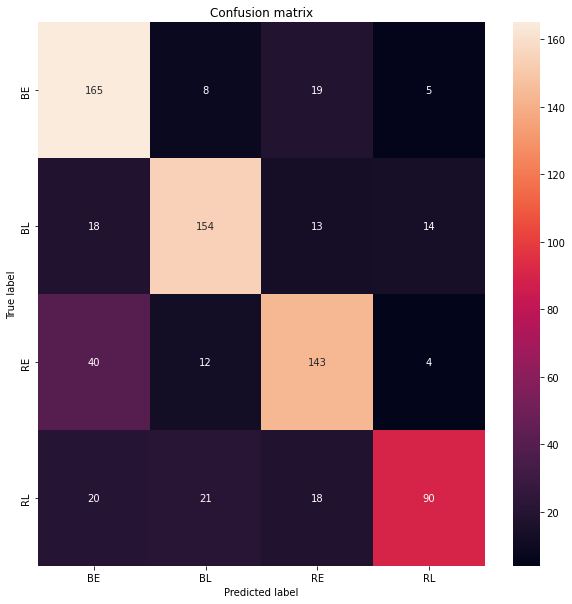

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = cm_rf
cm = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## k-Fold Cross Validation

In [29]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_knn = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
accuracies_svm = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
accuracies_kernel_svm = cross_val_score(estimator = kernel_svm_classifier, X = X_train, y = y_train, cv = 10)
accuracies_nb = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
accuracies_rf = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv = 10)

In [30]:
print('KNN accuracy: ', accuracies_knn.mean(), '(std:', accuracies_knn.std(), ')')
print('SVM accuracy: ', accuracies_svm.mean(), '(std:', accuracies_svm.std(), ')')
print('Kernel SVM accuracy: ', accuracies_kernel_svm.mean(), '(std:', accuracies_kernel_svm.std(), ')')
print('Naive Bayes accuracy: ', accuracies_nb.mean(), '(std:', accuracies_nb.std(), ')')
print('Random Forest accuracy: ', accuracies_rf.mean(), '(std:', accuracies_rf.std(), ')')

KNN accuracy:  0.8666113031884844 (std: 0.01729919067157149 )
SVM accuracy:  0.750675660407204 (std: 0.02706237572147637 )
Kernel SVM accuracy:  0.8521670847174203 (std: 0.0206324663274864 )
Naive Bayes accuracy:  0.44084468849569525 (std: 0.034411239490343276 )
Random Forest accuracy:  0.740609676180146 (std: 0.017554162273267858 )
